<h1>Tugas Intelegensi Buatan RA</h1>

### Anggota Kelompok: 
Giovanni Lucy Faustine (121140060) <br>
Fransiskus Xaverius Gunawan (121140010)

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>Tugas ini menggunakan dataset  <a href="https://www.kaggle.com/code/jchen2186/machine-learning-with-iris-dataset">iris data set</a>,
yang terdiri dari morofologi variasi bunga Iris, yaitu Iris setosa, Iris virginica dan Iris versicolor.</p>
<p>Empat feature yang diukur dari pengamatan:</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

iris = load_iris()

### Memuat Dataset

In [22]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target

In [23]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Tipe Data Setiap Variabel

In [24]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

Data diatas menunjukkan tipe data dari setiap variabel

### Distribusi Jenis Bunga Iris

In [25]:
print('Jumlah per jenis bunga Iris pada dataset:')
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
print(data['label'].value_counts())

Jumlah per jenis bunga Iris pada dataset:
label
0    50
1    50
2    50
Name: count, dtype: int64


In [26]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

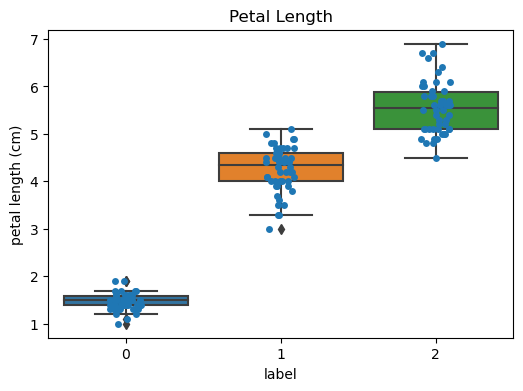

In [28]:
#Petal length
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='petal length (cm)',data=data).set_title('Petal Length')
fig=sns.stripplot(x='label',y='petal length (cm)',data=data,jitter=True,edgecolor='gray')

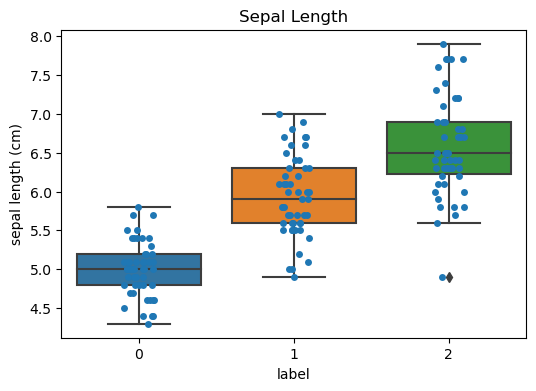

In [29]:
#Sepal length
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='sepal length (cm)',data=data).set_title('Sepal Length')
fig=sns.stripplot(x='label',y='sepal length (cm)',data=data,jitter=True,edgecolor='gray')

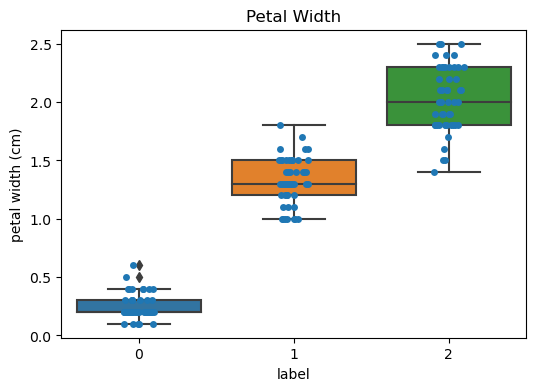

In [30]:
#petal width
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='petal width (cm)',data=data).set_title('Petal Width')
fig=sns.stripplot(x='label',y='petal width (cm)',data=data,jitter=True,edgecolor='gray')

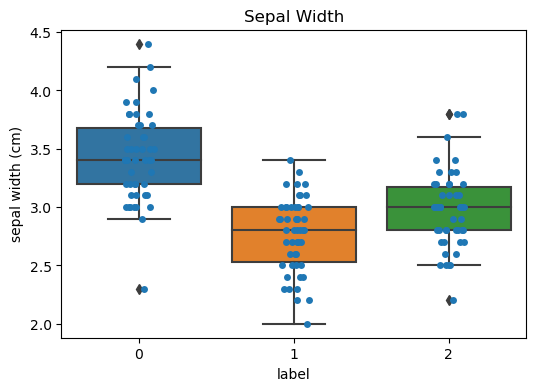

In [31]:
#Sepal width
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='sepal width (cm)',data=data).set_title('Sepal Width')
fig=sns.stripplot(x='label',y='sepal width (cm)',data=data,jitter=True,edgecolor='gray')

Dari plot di atas, kita dapat melihat bahwa data petal menawarkan perbedaan yang lebih jelas antara jenis-jenis bunga dibandingkan dengan data sepal (panjang & lebar).

### Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length.

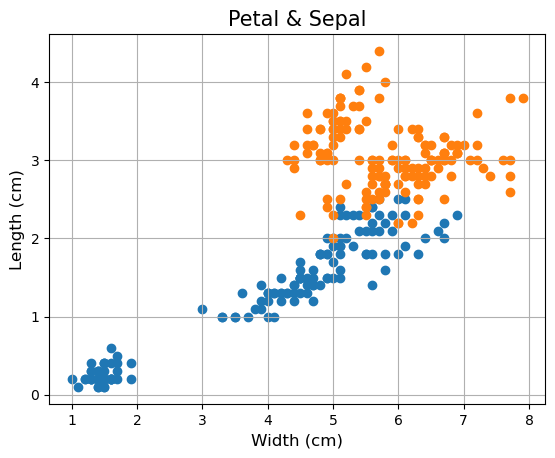

In [32]:
#Length Vs Width (Petal & Sepal)
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])
plt.title('Petal & Sepal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.grid()
plt.show()

In [33]:
# #create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c = data['label'].map(cmap_bold))
# plt.title('Petal', fontsize = 15)
# plt.xlabel('Width (cm)', fontsize = 12)
# plt.ylabel('Length (cm)', fontsize = 12)
# plt.grid()
# plt.show()

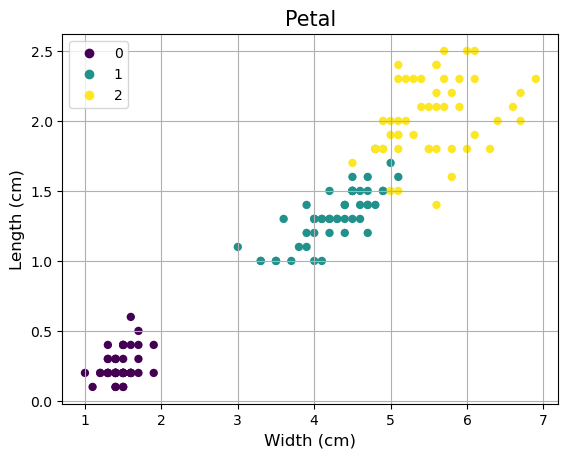

In [34]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(data['petal length (cm)'], data['petal width (cm)'],
                 c=data['label'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data['label'])]
plt.title('Petal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

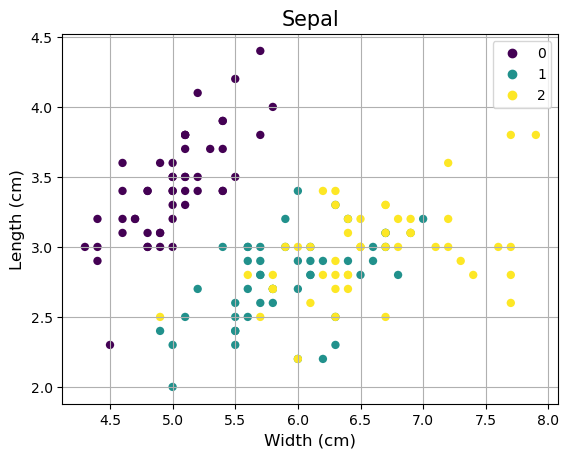

In [35]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],
                 c=data['label'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data['label'])]
plt.title('Sepal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

### Bagi data menjadi 70% data training dan 30% data testing untuk permodelan KNN

In [36]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### KNN fit dengan Petal.Width dan Peta.Length 2 neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

## Evaluasi algoritma dengan random forest, decision tree, classification_report dan confusion_matrix 

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))  

Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [50]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_confusion_matrix)


Confusion Matrix for Random Forest:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


# Menghitung confusion matrix untuk Decision Tree
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print("\nConfusion Matrix for Decision Tree:")
print(dt_confusion_matrix)


Confusion Matrix for Decision Tree:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [46]:
print("Accuracy Score with K = 3")
print(accuracy_score(y_test, y_pred))

Accuracy Score with K = 3
1.0


### Percobaan jika value K adalan 3 dan 5

In [47]:
# Instantiate learning model (k = 5)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
print("Accuracy Score with K = 5")
print(accuracy_score(y_test, y_pred5))

Accuracy Score with K = 5
1.0


In [48]:
# Instantiate learning model (k = 45)
clf45 = KNeighborsClassifier(n_neighbors=45)
clf45.fit(X_train, y_train)
y_pred45 = clf45.predict(X_test)
print("Accuracy Score with K = 45")
print(accuracy_score(y_test, y_pred45))

Accuracy Score with K = 45
0.9777777777777777


In [49]:
# Instantiate learning model (k = 45)
clf65 = KNeighborsClassifier(n_neighbors=65)
clf65.fit(X_train, y_train)
y_pred65 = clf65.predict(X_test)
print("Accuracy Score with K = 65")
print(accuracy_score(y_test, y_pred65))

Accuracy Score with K = 65
0.5111111111111111


Dari hasil akurasi score, terlihat bahwa akurasi tidak berubah hingga K = 40 atau lebih, yang menunjukkan bahwa model KNN mampu dengan baik menangkap perbedaan-perbedaan dalam fitur (perbedaan tersebut sangat terdefinisi dengan baik) dan menggunakan informasi tersebut untuk menentukan jenis bunga. Namun model ini terlalu fleksibel dan menangkap semua variasi yang terlihat dalam data (overfitting).

### Referensi

K. Thirunavukkarasu, A. S. Singh, P. Rai and S. Gupta, "Classification of IRIS Dataset using Classification Based KNN Algorithm in Supervised Learning," 2018 4th International Conference on Computing Communication and Automation (ICCCA), Greater Noida, India, 2018, pp. 1-4.

Wardani, Sistria H. (2016). Aplikasi Klasifikasi Jenis Tumbuhan Mangrove Berdasarkan Karakteristik Morfologi Menggunakan Metode K-Nearest Neighbor (KNN) Berbasis Web. Pontianak : Jurusan Sistem Komputer Fakultas MIPA Universitas Tanjungpura. ISSN : 2338-493X

Pan, D., Zhao, Z., Zhang, L., & Tang, C. 2017. Recursive Clustering K-Nearest Neighbors Algorithm and the Application in the Classification of Power Quality Disturbance. IEEE Conference on Energy Internet and Energy System Integration (EI2) : 1-5.

Y. Pachipala, H. C. Maddipati, P. S. Udimudi, V. Thota, V. N. Sree and L. R. Burra, "Iris Flower Classification by using Random Forest in AWS," 2022 6th International Conference on Intelligent Computing and Control Systems (ICICCS), Madurai, India, 2022, pp. 1772-1777, doi: 10.1109/ICICCS53718.2022.9788415.